In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('../DATA/solvay_conference.jpg',0)

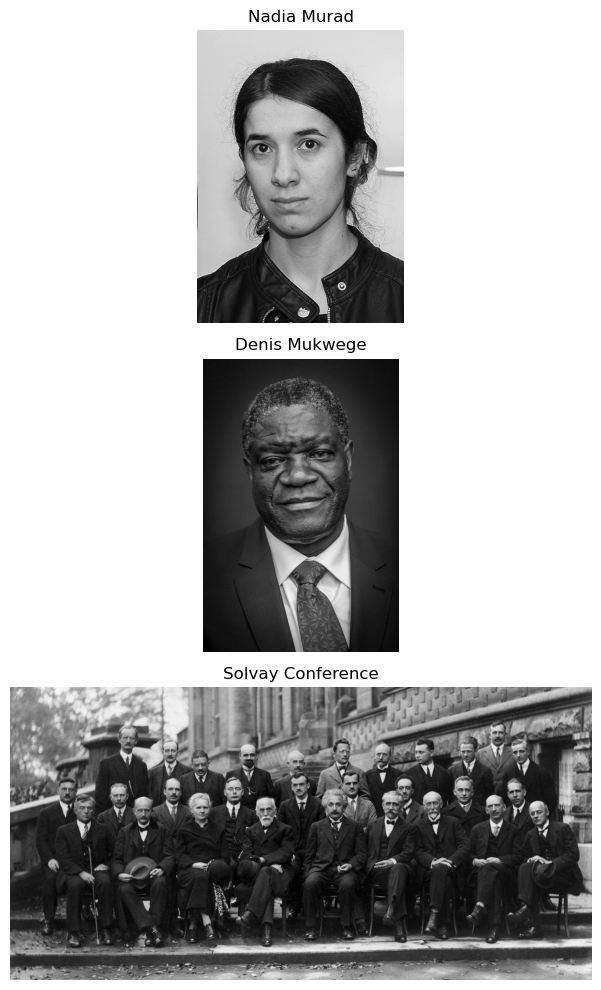

In [4]:
plt.figure(figsize=(10, 10))

# Plot Nadia's image
plt.subplot(3, 1, 1)
plt.imshow(nadia, cmap='gray')
plt.title('Nadia Murad')
plt.axis('off')

# Plot Denis's image
plt.subplot(3, 1, 2)
plt.imshow(denis, cmap='gray')
plt.title('Denis Mukwege')
plt.axis('off')

# Plot Solvay conference image
plt.subplot(3, 1, 3)
plt.imshow(solvay, cmap='gray')
plt.title('Solvay Conference')
plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [6]:
def detect_face(img):
    face_img = img.copy()
    face_rectangles = face_cascade.detectMultiScale(face_img)

    for (x,y,w,h) in face_rectangles:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    return face_img

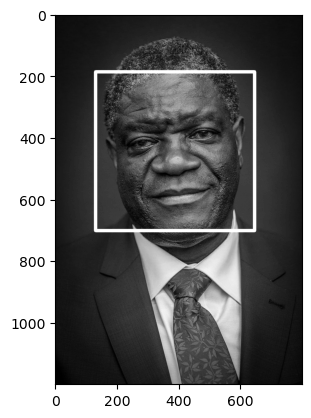

In [7]:
result = detect_face(denis)
plt.imshow(result, cmap='gray')

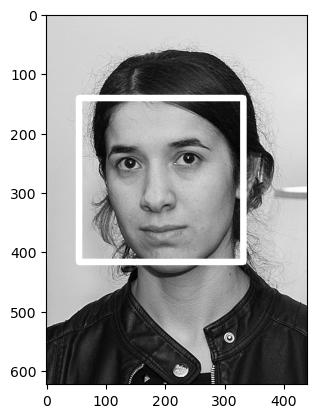

In [8]:
result = detect_face(nadia)
plt.imshow(result, cmap='gray')

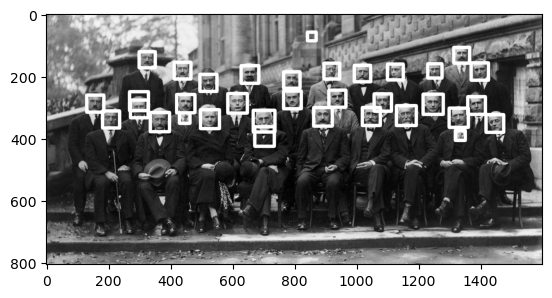

In [9]:
#worked well for single face but getting double faces and maybe a gargoyle in the back
result = detect_face(solvay)
plt.imshow(result, cmap='gray')

In [10]:
def adjusted_detect_face(img):
    face_img = img.copy()
    face_rectangles = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in face_rectangles:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    return face_img

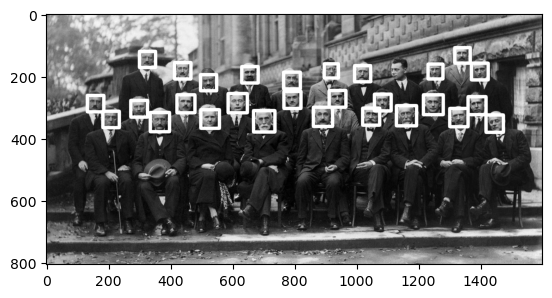

In [11]:
#Adjusted but can no longer detect the guy looking sideways there is a tradeoff by adjusting scaleFactor and minNeighbors 
result = adjusted_detect_face(solvay)
plt.imshow(result, cmap='gray')

Now we can check for eyes

In [12]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [17]:
def detect_eyes(img):
    face_img = img.copy()
    eye_rectangles = eye_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)

    for (x,y,w,h) in eye_rectangles:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255,255,255), 10)
    return face_img

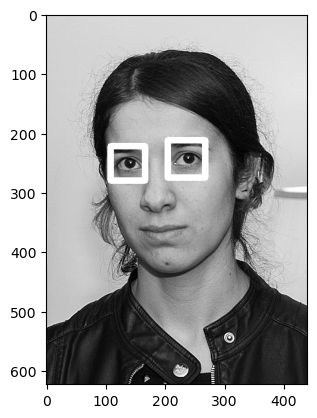

In [18]:
result = detect_eyes(nadia)
plt.imshow(result, cmap='gray')

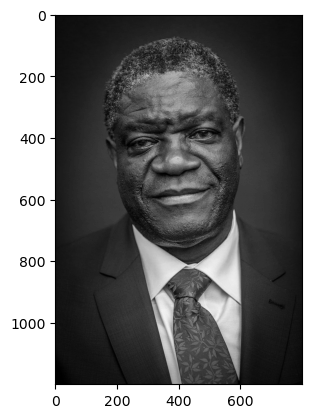

In [19]:
#Cant detect eyes because of cameraman editing, the whites of his eyes are too dark to detect!
result = detect_eyes(denis)
plt.imshow(result, cmap='gray')

In [21]:
#How can we do this with video?

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)

    cv2.imshow('Video Face Detect', frame)

    k = cv2.waitKey(1)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()